In [86]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# font = {'weight' : 'bold',
#         'size'   : 18}

# matplotlib.rc('font', **font)

# print(plt.style.available)
# plt.style.use('seaborn-notebook')
plt.style.use(['seaborn-poster', 'fivethirtyeight', 'seaborn-whitegrid', 'seaborn-colorblind'])

# Introducing laws of probability through a betting game

## The game
 - Throwing a coin and betting on the outcome being a Heads or a Tails
 - If the outcome is Heads you win £1 otherwise you win £0
 - Under what conditions would you play this game?

In [2]:
def throw(p=True):
    if np.random.rand() > 0.5:
        if p:
            print('Heads')
        return 1.0
    else:
        if p:
            print('Tails')
        return 0.0

In [3]:
_ = throw()

Tails


In [4]:
results = np.array([throw(p=False) for _ in range(100)])
print(np.mean(results))

0.53


## Would you play:
 - If it costs £0.05 to play?


In [5]:
def game(Games, cost_to_play, p=True):
    yes='Yes'
    no='No'

    total_cost = Games * cost_to_play
    if p:
        print(f'Amount it costs you : £{total_cost}')

    winnings = np.sum(np.array([throw(p=False) for _ in range(Games)]))
    if p:
        print(f'Amount you win : £{winnings}')

    if p:
        print(f'Was it wise to play {yes if winnings>total_cost else no}')
    return 1 if winnings>total_cost else 0

In [6]:
Games = 100
cost_to_play = 0.05

_ = game(Games, cost_to_play)

Amount it costs you : £5.0
Amount you win : £43.0
Was it wise to play Yes


 - If it costs £0.95 to play?

In [7]:
Games = 100
cost_to_play = 0.95

_ = game(Games, cost_to_play)

Amount it costs you : £95.0
Amount you win : £45.0
Was it wise to play No


## You now own the game
### What would you set the sell and buy prices at if I choose whether I want to buy or sell?
 - If I choose to sell you pay £p to buy and I give you £1 if the outcome is heads
 - If I choose to buy I pay £p to sell and you give me £1 if the outcome is heads

### If you have a belief p in the outcome:
 - you would be willing to buy at $\le$ £p
 - and you would be willing to sell at $\ge$ £p
 
### This captured our degree of uncertainty about the event taking place (aka $\textbf{uncertainty}$)

# Rational Beliefs
## New game with two coins
 - Betting on the outcome of coin 1 being Heads
 - Betting on the outcome of coin 2 being Tails
 
 - You set the price for coin 1 at £q and for coin 2 at £p
 - I decide whether to buy or sell


In [8]:
throws = 100
p = 0.4
q = 0.4


In [9]:
will_i_buy = True if (p+q)<1 else False

if will_i_buy:
    print(f'Will I buy off you {will_i_buy}')
    results1 = np.array([throw(p=False) for _ in range(throws)])
    results2 = 1-np.array([throw(p=False) for _ in range(throws)])
    
    total_cost = throws*(p+q)
    print(f'Amount it costs me : £{total_cost}')
    
    winnings = np.sum(results1) + np.sum(results2)
    print(f'Amount I win : £{winnings}')
    
else:
    print(f'Will I buy off you {will_i_buy}')


Will I buy off you True
Amount it costs me : £80.0
Amount I win : £97.0


### Outcome
 - If £q + £p is less than £1 then I will always play as there is 50% chance of winning each game
 - If I play enough times I will win £1 on average from each game, but it costs less than £1 to play
 - This is called a Dutch book, you are guarenteed to lose money.

### Set of beliefs is called rational is no Dutch book exists

## More formally - Rational beliefs
 - Define a sample space $\textbf{X}$ of events
  - E.g. flipping two coins $\textbf{X = {HH, HT, TH, TT}}$
 - Let $\textbf{A}$ be an event (a subspace of $\textbf{X}$)
  - If $\textbf{A}$ holds true at least one outcome occured
  - E.g. "At least on head occured" $\leftrightarrow$ $\textbf{A = {HH, HT, TH}}$
 - Write $P_A$ for belief of an event
  - Your wager on $\textbf{A}$ (assuming all wagers are unit wagers)

#### Sum of probabilities equals 1
 - Can show that $\{P_A\}_{A \subset X}$ are rational beliefs iff $\{P_A\}_{A \subset X}$ satisfy laws of probability theory

### We have just shown that $p_{A} + p_{A^{c}} = 1$



### In addition, I claim that:
 - $0 \leq p_X \leq 1$
 - $p_X = 1$
 - $P_{A \cup B}$ = $P_A$ + $P_B$

#### Back to the game
 - $p_A > 1$
 - I sell the bet on a coin flip where you win £1 if the outcome is Heads at $>$ 1

In [10]:
Games = 100
cost_to_play = 1.1

_ = game(Games, cost_to_play)

Amount it costs you : £110.00000000000001
Amount you win : £48.0
Was it wise to play No


#### Back to the game
 - $p_a < 0$
 - I buy the bet on a coin flip where you win £1 if the outcome is Heads at $<$ 0
 - ...
 - Given the cost is less than £0, you will pay me to play so I am winning even when the coin flip doesn't go my way!

#### Back to the game
 - $p_X > 1$
 - Your belief that at least one outcome in X holds true
 - ...
 - Same as $P_A > 1$ if you belive that at least one outcome holding true is worth $>$ than £1 in a game where the payout is £1 I will sell to you

#### Back to the game
 - $p_X = 1$
 - Your belief that at least one outcome in X holds true
 - ...
 - Same as $P_A < 1$ if you belive that at least one outcome holding true is worth $<$ that £1 in a game where the payout is £1 I will sell to you
 - At least one outcome must hold. You will lose £1-p

#### Back to the game
 - $P_{A \cup B}$ = $P_A$ + $P_B$
 - $P_A$ your price to pay if event A happens
 - $P_B$ your price to pay if event B happens
 - $P_{A \cup B}$ your price to pay if event A or B happens
 - ...
 - if $P_{A \cup B}$ < $P_A$ + $P_B$
  - I will sell you A and B and buy A$\cup$B (two disjoint events) from you

In [11]:
Pa = 0.5
Pb = 0.5
Paub = 0.8

if Paub < Pa+Pb:
    cost_to_you = Pa + Pb
    cost_to_me = Paub
    print(f'Amount you owe me : £{cost_to_you-cost_to_me}')
else:
    print(f'I will not play')



Amount you owe me : £0.19999999999999996


## The three axioms of propability follow from these three properties of rational beliefs
### $0 \leq p_A \leq 1$ $\>\>\>\>\>\>$ $\forall A \subset X$
### $p_X = 1$
### $P_{A \cup B}$ = $P_A$ + $P_B$


# Introducing Bayesian statistics

![title](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png)

### First conditional probability
 - Assuming that $p_B > 0$
 - We define the conditional probability of $A$ given that $B$ has occured as follows:
 - $p(A \mid B) = \dfrac{p(AB)}{p(B)}$
 - ...
 - Note: In general $p(A \mid B)$ is not equal to $p(B \mid a)$
 - ...
 - If $A$ and $B$ are independent events then $p(A \mid B) = p(A)$

# Bayes Theorem

 - To make probability statements about $\theta$ given $data$ we start with a model providing a joint probability distribution for $\theta$ and $data$, $p(\theta, data)$.
 - This can be rewritten : $p(\theta, data) = p(data \mid \theta) p(\theta)$ 
 
## $p(\theta \mid data) = \dfrac{p(\theta \: data)}{data} =  \dfrac{p(data \mid \theta) p(\theta)}{p(data)}$
 - Posterior : $p(\theta \mid data)$
 - Likelihood : $p(data \mid \theta)$
 - Prior : $p(\theta)$
 - Model Evidence : $p(data)$
 


### Example likelihood model is a coin flip
 - A fair coin gives $\theta = 0.5$
 - ...
 - So what is the probability of generating a particular sample given the model parameters
 - $Pr(H,H \mid \theta = 0.5) = Pr(H \mid \theta = 0.5)Pr(H \mid \theta = 0.5) = 0.5 * 0.5 = 0.25$

### Example prior over parameters for the coin
 - We may not know that the coin is fair
 - We could define a prior assigning the same prior belief across all possible parameter values, or
 - We could define a prior belief more confident the coin is fair

Text(0.5, 1.0, 'Prior beliefs about the coin')

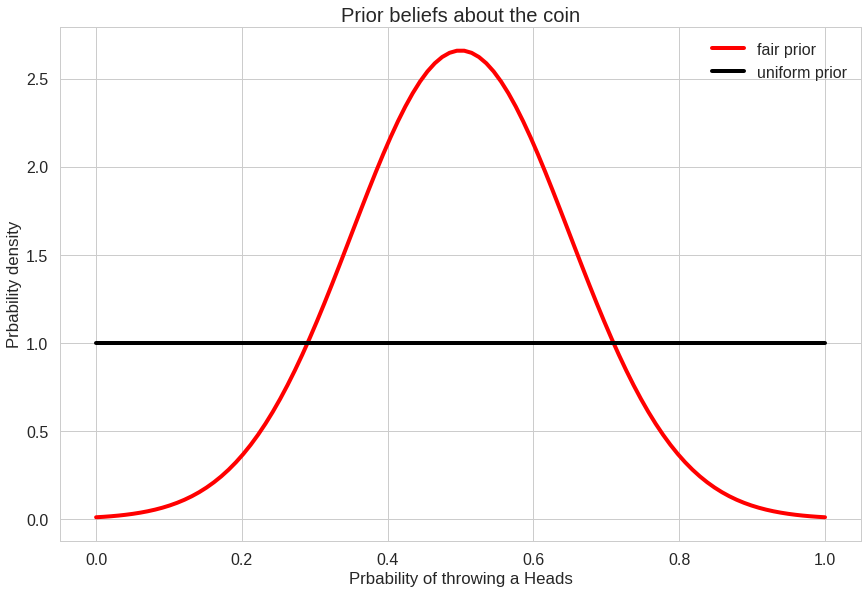

In [32]:
x = np.linspace(0, 1, 100)
fair_prior = stats.norm.pdf(x, 0.5, 0.15)
uniform = np.ones(100)
fig, ax = plt.subplots()
ax.plot(x, fair_prior, 'r', label='fair prior')
ax.plot(x, uniform, 'k', label='uniform prior')
ax.legend()
ax.set_xlabel('Prbability of throwing a Heads')
ax.set_ylabel('Prbability density')
ax.set_title('Prior beliefs about the coin')

### The evidence 
 - $p(data) = \int p(data \mid \theta) p(\theta) d \theta$

### The posterior 
 - $p(\theta \mid data)$
 - May want to know the posterior using a uniform prior given before and knowing a coin was flipped 10 times giving 7 heads, or
 - The coin was flipped 100 times giving 70 heads

#### For a coin throwing example the likelihood is calculated using the following equation
 - $p(data \mid \theta) = \prod _{i} p(y_i \mid \theta) = \theta^{\#heads} (1-\theta)^{\#tails}$

### The unnormalized posterior is often used as the model evidence can be difficult to calculate, this is calculated as $p(data \mid \theta) p(\theta)$

#### Posterior calculation

In [76]:
def calc_posterior(theta, num_heads, num_throws, prior, normalize = True):
    ## Likelihood calculation
#     likelihood = (math.factorial(num_throws)/(math.factorial(num_heads)*math.factorial(num_throws-num_heads))) * np.power(theta,num_heads) * np.power((1-theta),(num_throws-num_heads))
    likelihood = np.power(theta,num_heads) * np.power((1-theta),(num_throws-num_heads))
    if normalize:
        ## Normalizing
        normalizing = (math.factorial(num_heads) * math.factorial(num_throws-num_heads)) / math.factorial(num_throws+1)
        ## Posterior density calculation
        posterior = likelihood * prior / normalizing
    else:
        posterior = likelihood * prior
    return posterior

In [77]:
## Prior calculation
prior = np.ones(100) #Uniform

In [78]:
## Data
x = np.linspace(0, 1, 100)
num_heads = 7
num_throws = 10

## Get posterios
posterior7 = calc_posterior(theta=x, num_heads=num_heads, num_throws=num_throws, prior=prior, normalize=False)

In [79]:
## Data
x = np.linspace(0, 1, 100)
num_heads = 70
num_throws = 100

posterior70 = calc_posterior(theta=x, num_heads=num_heads, num_throws=num_throws, prior=prior, normalize=False)

Text(0, 0.5, 'Unnormalized Posterior density')

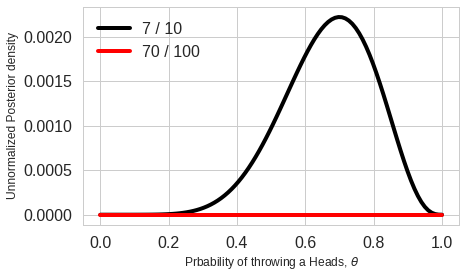

In [80]:
fig, ax = plt.subplots()
ax.plot(x, posterior7, 'k', label='7 / 10')
ax.plot(x, posterior70, 'r', label='70 / 100')
ax.legend()
ax.set_xlabel(r'Prbability of throwing a Heads, $\theta$')
ax.set_ylabel(r'Unnormalized Posterior density')
# ax.set_title('Posterior density')

#### Normlaized posterior calculation 
 - The model choice made allows for the normalizing constant (the model evidence) to be calculated
 - For a binomial distribution the model with a uniform prior the model evidence evaluates to:
  - $\int^1_0 \theta^{\#heads}(1-\theta)^{\#tails}d\theta = \dfrac{\#heads! (\#throws - \#heads)!}{(\#throws + 1)!}$

In [81]:
## Prior calculation
prior = np.ones(100) #Uniform

In [82]:
## Data
x = np.linspace(0, 1, 100)
num_heads = 7
num_throws = 10

## Get posterios
posterior7 = calc_posterior(theta=x, num_heads=num_heads, num_throws=num_throws, prior=prior, normalize=True)

In [83]:
## Data
x = np.linspace(0, 1, 100)
num_heads = 70
num_throws = 100

posterior70 = calc_posterior(theta=x, num_heads=num_heads, num_throws=num_throws, prior=prior, normalize=True)

Text(0, 0.5, 'Posterior density')

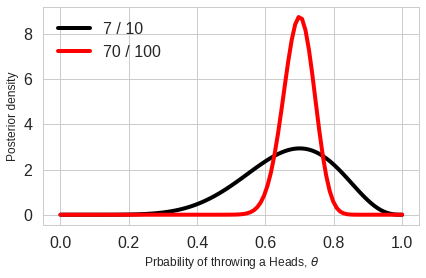

In [84]:
fig, ax = plt.subplots()
ax.plot(x, posterior7, 'k', label='7 / 10')
ax.plot(x, posterior70, 'r', label='70 / 100')
ax.legend()
ax.set_xlabel(r'Prbability of throwing a Heads, $\theta$')
ax.set_ylabel(r'Posterior density')
# ax.set_title('Posterior density')

In [50]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

def interactive_posterior(num_throws, num_heads):
    x = np.linspace(0, 1, 100)
    posterior_interactive = calc_posterior(theta=x, num_heads=num_heads, num_throws=num_throws, prior=prior, normalize=True)
    fig, ax = plt.subplots()
    ax.plot(x, posterior_interactive, 'k', label='interactive')
    ax.legend()
    ax.set_xlabel(r'Prbability of throwing a Heads, $\theta$')
    ax.set_ylabel(r'Posterior density')   

In [51]:
interact(interactive_posterior, 
         num_throws = widgets.FloatSlider(value=10,min=1,max=100,step=1),
         num_heads = widgets.FloatSlider(value=7,min=1,max=100,step=1))

interactive(children=(FloatSlider(value=10.0, description='num_throws', min=1.0, step=1.0), FloatSlider(value=…

<function __main__.interactive_posterior(num_throws, num_heads)>

## Likelihoods
 - Why likelihood not probability?
  - Assuming a fair coin $\theta = 0.5$ olding parameters fixed the resultant distribution of possible data samples is a valid distribution.
  - In Bayesian inference we don't keep the model parameters $\theta$ fixed. In Bayesian analysis the data is fixed and $\theta$ varies. This allows us to calculate the probability of data for any value of $\theta$
  
### Maximum likelihood
 - It is often useful to estimate the parameters of the model.
 - The Frequentist approach is to use maximum likelihood
 - The principle is to calculate parameter values which maximise the likelihood of obtaining our data sample.

### Example
 - 100 coin flips, N
 - 40 heads, h
 - Binomial model $\binom{N}{h}$ $\theta^h (1-\theta)^{N-h}$
 - $\mathcal{L}(\theta \mid h=40, N=100) = $ $\binom{100}{40}$ $\theta^{40} (1-\theta)^{100-40}$

### Method
 - We need to find $\theta$ which maximises the likelihood
 - Differentiate and set the gradient equal to zero
 - Actually turns out to be easier to differentiate the log likelihood
  - This works as the log transformation is maximised at the same value of $\theta$

### Solution
 - Take the log
  - $l(\theta \mid h=40, N=100) = \mathrm{log}\binom{100}{40} + \mathrm{40}log(\theta) + \mathrm{60}log(10\theta)$
 - Differentiate
  - $\dfrac{\partial l}{\partial \theta} = \dfrac{40}{\hat{\theta}} - \dfrac{60}{1-\hat{\theta}}$
  - $40(1-\hat{\theta}) = 60 \hat{\theta}$
  - $40 = 100\hat{\theta}$
  - $\hat{\theta} = \dfrac{2}{5} = 0.4$


In [59]:
def calc_likelihood(theta, num_throws, num_heads):
    likelihood = (math.factorial(num_throws)/(math.factorial(num_heads)*math.factorial(num_throws-num_heads))) * np.power(theta,num_heads) * np.power((1-theta),(num_throws-num_heads))
    return likelihood

Text(0, 0.5, 'likelhood density')

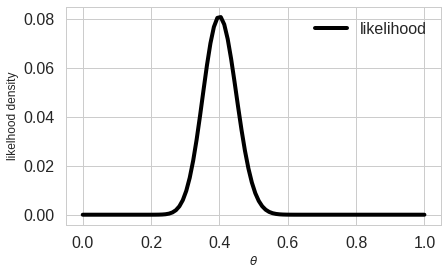

In [62]:
x = np.linspace(0, 1, 100)
num_throws = 100
num_heads = 40
likelihood = calc_likelihood(theta=x, num_heads=num_heads, num_throws=num_throws)
fig, ax = plt.subplots()
ax.plot(x, likelihood, 'k', label='likelihood')
ax.legend()
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'likelhood density')   

## Point posterior parameter estimates
 - We are often required to present point estimates.
 - The advantage of Bayesian statistics is, again, that we can provide uncertainty estimates of the single estimated value.
 - There are three predominant estimators in Batesian statistics:
  - the posterior mean
  - the posterior median
  - the maximum a posteriori (MAP) estimate
  
### Posterior Mean
#### Discrete case
 - The posterior mean is the expected calue of the posterior distribution:
  - $\mathbb{E} [\theta \mid data] = \sum_{\theta} \theta \times p(\theta \mid data)$
  - $\mathbb{V} [\theta \mid data] = \sum_{\theta} (\theta - \mathbb{E} [\theta \mid data])^2 \times p(\theta \mid data)$
  
#### Continuous case
 - The posterior mean is the expected calue of the posterior distribution:
  - $\mathbb{E} [\theta \mid data] = \int_{\theta} \theta \times p(\theta \mid data) d\theta$
  - $\mathbb{V} [\theta \mid data] = \int_{\theta} (\theta - \mathbb{E} [\theta \mid data])^2 \times p(\theta \mid data) d\theta$

### Posterior Median
 - The point on the posterior where 50% of the probability mass lies on either side of it.
 
### MAP
 - The parameter value that corresponds to the highest point in the posterior.
